# 📊 Netflix EDA + Recommendation System
End-to-end data analysis and content-based recommender system built with Python.

In [1]:

# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


In [2]:

# Replace this with the actual path if needed
df = pd.read_csv("netflix_titles.csv")

# Quick look
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:

# Check null values
df.isnull().sum()

# Fill missing values where possible
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Drop duplicates
df.drop_duplicates(inplace=True)


C:\Users\shiva\AppData\Local\Temp\ipykernel_18004\3373725615.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


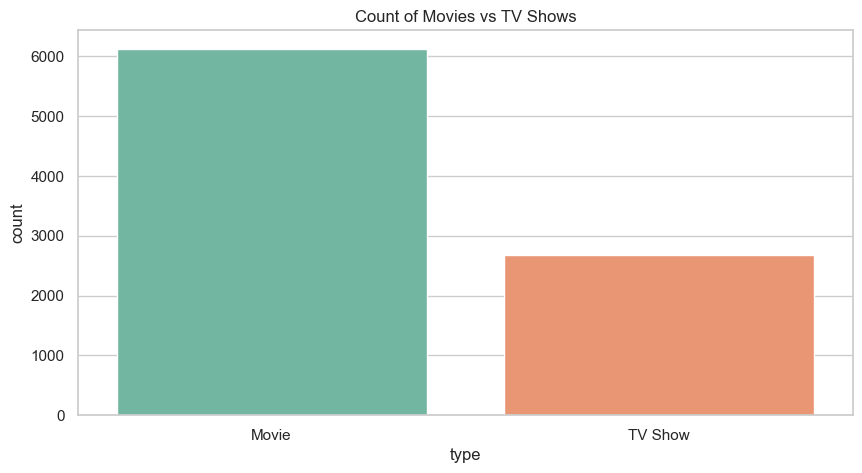

In [4]:

sns.countplot(data=df, x="type", palette="Set2")
plt.title("Count of Movies vs TV Shows")
plt.show()


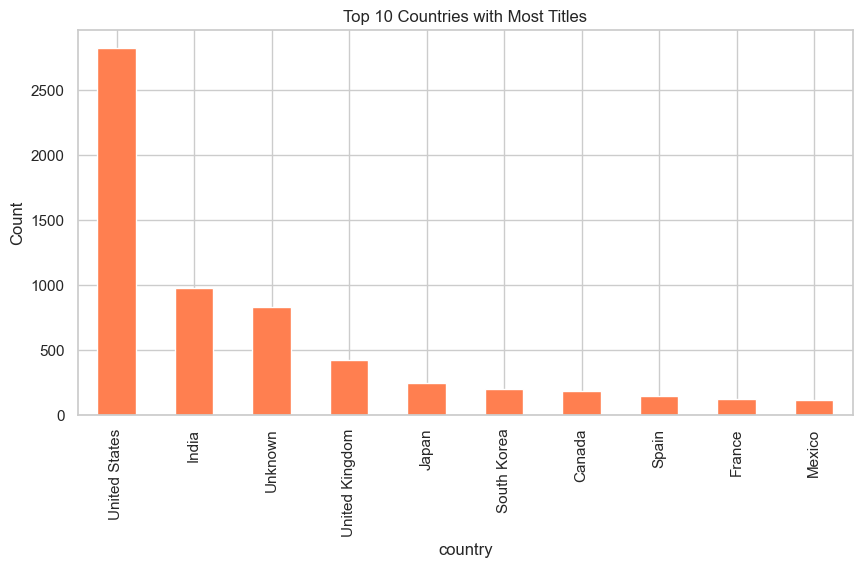

In [5]:

df["country"].value_counts().head(10).plot(kind="bar", color="coral")
plt.title("Top 10 Countries with Most Titles")
plt.ylabel("Count")
plt.show()


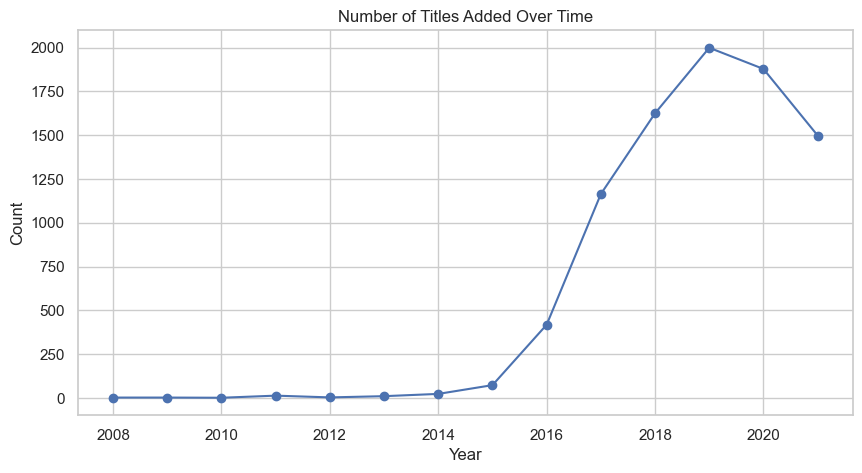

In [6]:

df["year_added"] = df["date_added"].dt.year
df["year_added"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Number of Titles Added Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [7]:

# TF-IDF Matrix
tfidf = TfidfVectorizer(stop_words="english")
df["description"] = df["description"].fillna("")
tfidf_matrix = tfidf.fit_transform(df["description"])

# Similarity scores
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Reset index for mapping
indices = pd.Series(df.index, index=df["title"]).drop_duplicates()


In [8]:

def recommend(title, cosine_sim=cosine_sim):
    if title not in indices:
        print(f"'{title}' not found in dataset!")
        return []
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5
    movie_indices = [i[0] for i in sim_scores]
    return df["title"].iloc[movie_indices]


In [12]:

recommend("Breaking Bad")


1920    The Book of Sun
1798       Alice Junior
4118        Iron Ladies
6616          Dismissed
2388      Alexa & Katie
Name: title, dtype: object

In [10]:

print("🔍 Insights:")
print("- Netflix has more Movies than TV Shows.")
print("- US & India are top content producers.")
print("- Peak content addition happened around 2018-2020.")
print("- Content-based recommender suggests similar titles using descriptions.")


🔍 Insights:
- Netflix has more Movies than TV Shows.
- US & India are top content producers.
- Peak content addition happened around 2018-2020.
- Content-based recommender suggests similar titles using descriptions.
